In [1]:
!pip install qiskit
!pip install qiskit qiskit-aer
!pip install pylatexenc

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 60.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 72.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 71.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=29cbe062f075dc901c4be73743664b868b0e03dde0bfe8ca01ebfe12fb88caf3
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc


In [2]:
# Import libraries
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

**Task 1: Change Gate Combination**

Both qubits are prepared in an equal superposition state, creating a uniform probability distribution among |00⟩, |01⟩, |10⟩, and |11⟩. The histogram confirms this uniformity, with each outcome appearing around 25% of the time.

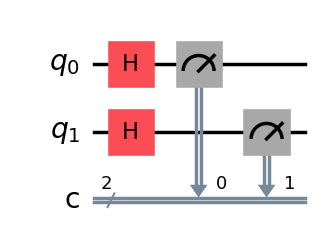

Measurement Results: {'01': 234, '11': 256, '10': 281, '00': 253}


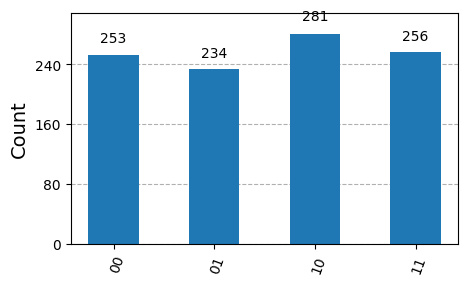

Observation: Each qubit is in superposition → Equal probabilities for 00, 01, 10, 11.


In [4]:
qc1 = QuantumCircuit(2, 2)
qc1.h(0)
qc1.h(1)
qc1.measure([0, 1], [0, 1])

compiled = transpile(qc1, sim)
counts = sim.run(compiled, shots=1024).result().get_counts()

# Drawing the circuit
fig, ax = plt.subplots(figsize=(5,3))
qc1.draw('mpl', ax=ax)
plt.show()

print("Measurement Results:", counts)
# Plot the histogram
fig, ax = plt.subplots(figsize=(5,3))
plot_histogram(counts, ax=ax)
plt.show()

print("Observation: Each qubit is in superposition → Equal probabilities for 00, 01, 10, 11.")

**Task 2:Swap Qubit Roles**

Applying the X gate flips the second qubit from |0⟩ to |1⟩, while the first qubit stays in the |0⟩ state. Consequently, the system collapses deterministically to |01⟩. The histogram displays a single bar, indicating a definite classical outcome without any superposition.

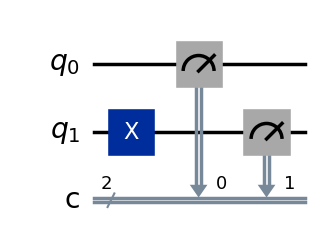

Measurement Results: {'10': 1024}


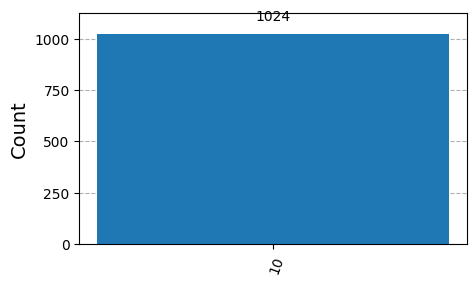

Observation: When we apply an X gate to the second qubit, it flips from |0⟩ to |1⟩.
Hence, the output state is |01⟩ instead of |10⟩ when compared to the original circuit.


In [5]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Step 1: Create the Aer simulator
sim = AerSimulator()

# Step 2: Build the circuit - apply X gate on the SECOND qubit
qc2 = QuantumCircuit(2, 2)
qc2.x(1)                       # Apply X gate on qubit 1 (the second qubit)
qc2.measure([0, 1], [0, 1])    # Measure both qubits

# Step 3: Run the circuit
compiled = transpile(qc2, sim)
result = sim.run(compiled, shots=1024).result()
counts2 = result.get_counts()

# Step 4: Plot the quantum circuit
fig, ax = plt.subplots(figsize=(5, 3))
qc2.draw('mpl', ax=ax)
plt.show()
print("Measurement Results:", counts2)
# Step 5: Plot the measurement results as a histogram
fig, ax = plt.subplots(figsize=(5, 3))
plot_histogram(counts2, ax=ax)
plt.show()
print("Observation: When we apply an X gate to the second qubit, it flips from |0⟩ to |1⟩.")
print("Hence, the output state is |01⟩ instead of |10⟩ when compared to the original circuit.")


**Task 3:Add a CNOT Gate**

This configuration creates a Bell state, an entangled state represented as ∣ψ⟩ = 1/√2 (|00⟩ + |11⟩). The measurement outcomes display only |00⟩ and |11⟩, each occurring with roughly 50% probability. Measuring one qubit immediately defines the state of the other—a clear demonstration of quantum entanglement.

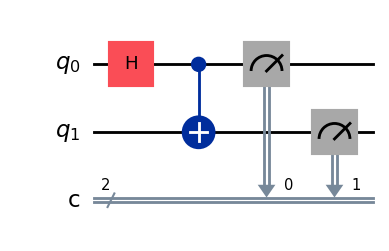

Measurement Results: {'00': 529, '11': 495}


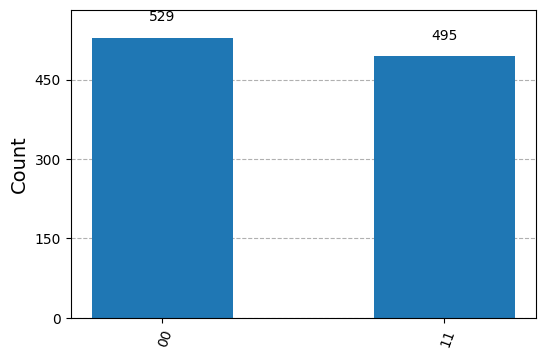

Observation: Bell State formed → Only |00⟩ and |11⟩ appear (entangled).


In [6]:
qc3 = QuantumCircuit(2, 2)
qc3.h(0)
qc3.cx(0, 1)
qc3.measure([0, 1], [0, 1])

compiled = transpile(qc3, sim)
counts3 = sim.run(compiled, shots=1024).result().get_counts()

fig, ax = plt.subplots(figsize=(5,3))
qc3.draw('mpl', ax=ax)
plt.show()
print("Measurement Results:", counts3)
fig, ax = plt.subplots(figsize=(6,4))
plot_histogram(counts3, ax=ax)
plt.show()
print("Observation: Bell State formed → Only |00⟩ and |11⟩ appear (entangled).")


**Task 4:Increase Measurement Shots**

As the number of shots increases, statistical noise diminishes, and the histogram becomes smoother and more symmetric. This leads to a more accurate 50/50 outcome, demonstrating that higher sampling improves experimental precision in quantum systems.

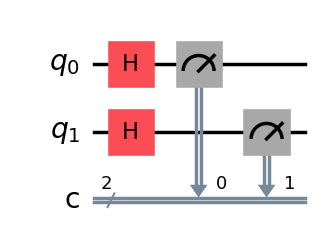

Measurement Results: {'01': 1018, '11': 1026, '00': 1020, '10': 1032}


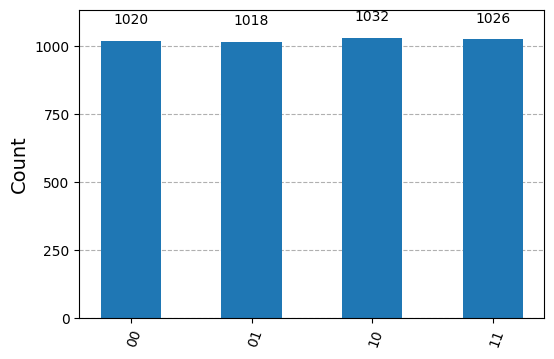

In [7]:
# Step 1: Create Aer simulator
sim = AerSimulator()
# Step 2: Create a 2-qubit circuit with Hadamard gates to create a superposition
qc4 = QuantumCircuit(2, 2)
qc4.h(0)
qc4.h(1)
qc4.measure([0, 1], [0, 1])

# Step 3: Transpile and run the circuit with higher shots (4096)
compiled = transpile(qc4, sim)
result = sim.run(compiled, shots=4096).result()
counts4 = result.get_counts()

# Step 4: Plot the circuit
fig, ax = plt.subplots(figsize=(5, 3))
qc4.draw('mpl', ax=ax)
plt.show()
print("Measurement Results:", counts4)

# Step 5: Plot histogram of the measurement results
fig, ax = plt.subplots(figsize=(6, 4))
plot_histogram(counts4, ax=ax)
plt.show()

**Task 5:Add a New Visualization**

The Bloch multivector illustrates that both qubits exhibit correlated orientations instead of independent positions, confirming the shared quantum state produced by entanglement. Prior to measurement, the qubits exist in a joint superposition; upon measurement, their states collapse to definite outcomes—either |00⟩ or |11⟩.

Quantum Circuit Diagram:


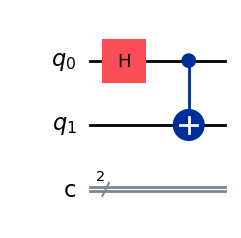

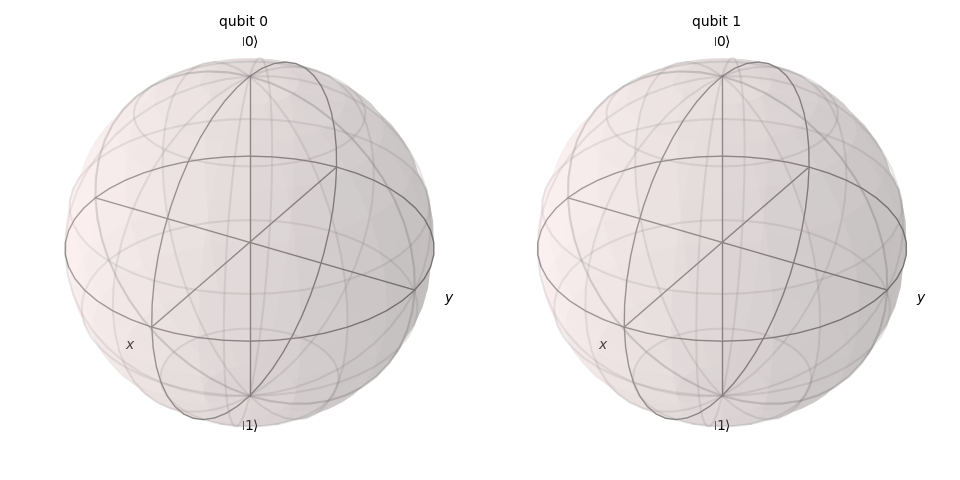

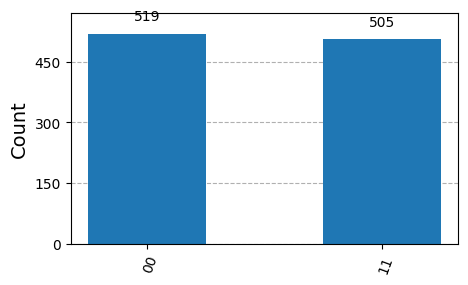

Observation:
Before measurement: The Bloch spheres show entanglement — correlated quantum states.
After measurement: The superposition collapses — histogram shows only classical outcomes.


In [9]:
#Step 1: Create Circuit Diagram
qc5 = QuantumCircuit(2, 2)
qc5.h(0)       # Apply Hadamard to qubit 0
qc5.cx(0, 1)   # Create entanglement with CNOT

#Step 2:Display Circuit Diagram
print("Quantum Circuit Diagram:")
display(qc5.draw('mpl'))
plt.show()

#Step 3: Bloch Sphere Visualization (Before Measurement)
state_before = Statevector.from_instruction(qc5)
fig_before = plot_bloch_multivector(state_before)
buf = io.BytesIO()
fig_before.savefig(buf, format='png')
buf.seek(0)
display(Image(data=buf.getvalue()))
plt.close(fig_before)

#Step 4:Measurement and Simulation
qc5.measure([0, 1], [0, 1])
compiled = transpile(qc5, sim)
result = sim.run(compiled, shots=1024).result()
counts_after = result.get_counts()

#Step 5:Histogram (After Measurement)
fig, ax = plt.subplots(figsize=(5,3))
plot_histogram(counts_after, ax=ax)
plt.show()

print("Observation:")
print("Before measurement: The Bloch spheres show entanglement — correlated quantum states.")
print("After measurement: The superposition collapses — histogram shows only classical outcomes.")